# Analysis of Video Games Sales 

## Content
+ <a href='#1.-Introduction.-Video-Game-Industry'>Introduction. Video Game Industry</a>

+ <a href='#2.-Data-description-and-objectives'>Data description and objectives</a>

+ <a href='#3.-Data-validation-and-manipulation'>Data validation and manipulation</a>

+ <a href='#4.-Data-visualization'>Data visualization</a>

+ <a href='#5.-Conclusion'>Conclusion</a>

## [1. Introduction. Video Game Industry]()

Today, the video game industry is one of the largest in the entertainment industry. Its capitalization in 2021 reached more than USD 190 billion with an increase of more than 9% per year. The expected value of the industry by 2026 is estimated at USD 314 billion. Every year the video game industry is growing more and more. But it was not always so.

Initially, in the mid-70s, it was a small community of enthusiasts. But over the years it has increased more and more, and with it the profit has grown. From low-profit projects over several decades, the total annual profit has grown to USD 9.5 billion, and in 2021 this figure was USD 60 billion. Every year, a large number of new projects come out, both from large and influential companies, as well as from indie developers. The variety of games attracts more and more people. The availability of games also contributes to this. Even on non-gaming computers, you can run indie games. On the road, you can always kill time in arcade games. In general, over time, gaming has become ubiquitous.

This project will provide the analysis of Video Game sales from 1980 to 2020 in 3 different regions.

## [2. Data description and objectives]()

This dataset was scrapped from https://www.vgchartz.com/. It contains a list of video games from 1980 to 2020 with more than 100,000 saled copies. Total number of this records is 16,598. Below is attributes we will use in our analysis:

+ Rank - Ranking of overall sales
+ Name - Game title
+ Platform - Platform on which the game was released
+ Year - Year of the game's release
+ Genre - Genre of the game
+ Publisher - Publisher of the game
+ NA_Sales - Sales in North America (in millions)
+ EU_Sales - Sales in Europe (in millions)
+ JP_Sales - Sales in Japan (in millions)
+ Other_Sales - Sales in the rest of the world (in millions)
+ Global_Sales - Total worldwide sales

## Objectives

For this project, analysis and visualization consists of 5 parts:

+ <a href='#4.1-Game-prevalance-in-regions-over-years'>Game prevalance in regions over years</a>

+ <a href='#4.2-Popularity-of-genres-over-time'>Popularity of genres over time</a>

+ <a href='#4.3'>Most popular genres in regions</a>

+ <a href='#4.4'>Demand of publishers over time</a>

+ <a href='#4.5'>Platform impact on game sales</a>

## [3. Data validation and manipulation]()

For easier and clean work with data we will make some manipulation: 
+ Drop unnecessary columns
+ Rename column for better visualization
+ Determine how many missing values
+ Change type of necessary columns

In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np

In [2]:
# Reading our data frame from csv file.
df = pd.read_csv('vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
# Shape of data frame.
df.shape

(16598, 11)

In [4]:
df = df.drop('Rank', axis = 1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Renaming Sales columns to better look visualization.
df.columns = df.columns.str.replace('_', ' ')
df.head()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Checkout missing values.
# As we can see there are missing values in Year and Publisher columns. 
# There are not so many rows to have an impact on statistics, so we will delete them.
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA Sales          0
EU Sales          0
JP Sales          0
Other Sales       0
Global Sales      0
dtype: int64

In [7]:
# Delete rows with null values
df = df.dropna()

In [8]:
# Changing Year column data type to int for better visualization
df['Year'] = df['Year'].astype(int)
df.head()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
# As we can see there are too few values in 2016, 2017, 2020. So we will delete them.
df.groupby('Year').sum().tail()

,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
Year,,,,,
2014,131.97,125.63,39.46,40.02,337.03
2015,102.82,97.71,33.72,30.01,264.44
2016,22.66,26.76,13.67,7.75,70.90
2017,0.00,0.00,0.05,0.00,0.05
2020,0.27,0.00,0.00,0.02,0.29


In [10]:
df = df[(df['Year'] != 2016) & (df['Year'] != 2017) & (df['Year'] != 2020)]
df.groupby('Year').sum().tail()

,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
Year,,,,,
2011,241.00,167.31,53.04,54.39,515.80
2012,154.93,118.76,51.74,37.82,363.49
2013,154.77,125.80,47.59,39.82,368.11
2014,131.97,125.63,39.46,40.02,337.03
2015,102.82,97.71,33.72,30.01,264.44


## [4. Data visualization]()

Before start, we shoud import all needed libraries 

### [4.1 Game prevalance in regions over years]()

In [11]:
import matplotlib.pyplot as plt
from ipywidgets import interact

#plt.style.use('classic')
plt.rc('figure', figsize = (16, 9))

In [28]:
game_prevalance = df.groupby('Year').sum().drop('Global Sales', axis = 1)
game_prevalance.head()

,NA Sales,EU Sales,JP Sales,Other Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


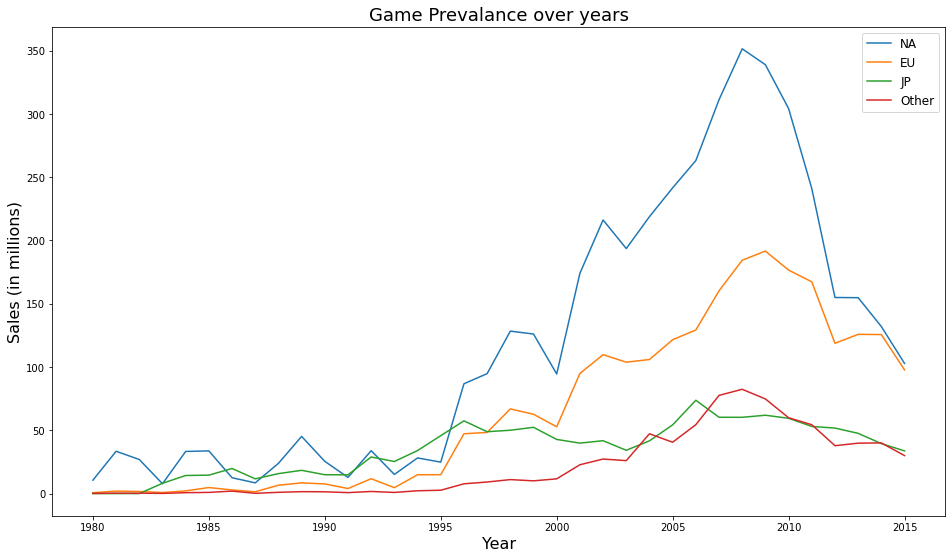

In [42]:
for i in game_prevalance.columns:
    plt.plot(game_prevalance[i], label = i.split()[0])

plt.title('Game Prevalance over years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Sales (in millions)', fontsize = 16)
plt.legend(fontsize = 12)

plt.show()

### [4.2 Popularity of genres over time]()

In [32]:
# def x(Region):
#     plt.plot(game_prevalance[Region])
#     plt.xlabel('Year', fontsize = 16)
#     plt.ylabel('Sales (in millions)', fontsize = 16)
#     plt.title(f'Game Prevalance in {Region.split()[0]}', fontsize = 18)
#     plt.grid(color = 'grey')
#     plt.show()
# interact(x, Region = game_prevalance.columns);